# Random or not so random?

In the project, you will study the optimization algorithms related to the randomization. For a group of random algorithms, the randomness could be improved through certain strategy. The reference for this project comes from https://arxiv.org/pdf/1202.4184.pdf . 

The mathematical problem discussed in the above paper is quite simple, however it provides some insights for data science, especially for linear problems. The conjecture in the paper is still an open problem in general.

## First things first
We review the gradient descent method learned in last quarter, for minimization of $f(x)$, the Gradient Descent (GD) iteration is 
$$x_{k+1} = x_k - \alpha_k \nabla f(x_k)$$
with $\alpha_k$ the chosen step length, usually a backtracking type loop is associated for the choice of $\alpha_k$. 



## Incremental GD
There are some variants of GD, like coordinate gradient descent or the stochastic gradient descent. Here we focus on the IGD: incremental GD, it is similar to the coordinate GD, which is dealing with something local and then deal with something else later. 

Suppose the problem is:
$$\min_x f(x) := \sum_{i=1}^m f_i(x)$$
the objective function is the summation of a few other objective functions. This is quite normal in real life applications. Especially the statistics and imaging science. 

The IGD is dealing with one of the $f_i$ with GD and then deal with others in similar manner. Suppose we have fixed an ordering $i_0, i_1, i_2, \dots, i_k,\dots$, this ordering is infinite or finite, the numbers are just sampled from $\{ 1,2,\dots, m\}$, basically telling you an order of $f_i$ to deal with. During each iteration, we update $x_k$ by

$$x_{k+1} = x_{k} - \gamma_k \nabla f_{i_k}(x_{k})$$
where $\gamma_k$ is the step length.  

When the ordering is sampled uniformly from $\{ 1,2,\dots, m\}$, then this method becomes **Stochastic GD**. But the ordering could be other kind or distribution, even deterministic, we will mainly focus on select a better strategy for the ordering.

## Implementation Task 1

This task comes from the Section 2.1 of the reference paper.

We implement the 1D example of least square problem for the IGD. Then problem is given by 

$$\min_x \frac{1}{2}\sum_{i=1}^n (x- y_i)^2$$
where $y_i$ is a sequence of scalars sampled with certain given mean value $\mu$ and variance $\sigma^2$. Following the above method, the iteration will be
$$x_{k+1} =x_k -\gamma_k (x_{k} - y_{i_k})$$
where $y_{i_k}$ comes from the selected ordering.  

In the first task, you need to implement the following functions. 

In [0]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].

import numpy as np

def generate_random_numbers(n, mu, sigma, dist="normal"):
    # write your code here.
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        return np.random.uniform(mu - sigma/np.sqrt(3), mu + sigma/np.sqrt(3),n)
        # write your code here.
        pass
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        
        
# test your code:
y_test = generate_random_numbers(5, 0, 0.1, "normal")

In [0]:
y_test = generate_random_numbers(5, 0, 0.1, "uniform")
print(y_test)


[ 0.01454283  0.05689861  0.05678338 -0.00956593  0.03396902]


### Settings of the minimization problems
Now you will setup the problem with a sampling of $y$ vector with the following two different settings:
```
n, mu, sigma, dist = 105, 0.5, 1.0, "normal"
```
and 
```
n, mu, sigma, dist = 105, 0.5, 1.0, "uniform"
```
Your initial guess will be $x_0 = 0$ for both cases. The step length is taking the diminishing factor $\gamma_k = \frac{1}{k+1}$.

In [0]:
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")

### Two orderings to experiment with

1. Random ordering with replacement
In this case, we do not choose the fixed ordering, we sample a number in $\{1,2,\dots, n \}$ each time and follow the iteration.

2. Random ordering without replacement
In this case, we do not choose the fixed ordering, we sample an ordering without replacement from $\{1,2,\dots, n\}$ and then follow the iteration.

In [0]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task1(y):
    n = len(y)
    num_epochs = 1
    f = []
    x = 0
    for e in range(num_epochs):
        ordering = np.random.choice(n, n, replace=True)
        for i in range(n):
            loss = 1/2*np.sum((x-y)**2)
            f.append(loss)
            gamma = 1/(i+1)#question? i or j
            x = x-gamma*(x-y[ordering[i]])
            #         print(loss)
    return (x,f)

        
        
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task1(y):
    n = len(y)
    num_epochs = 1
    f = []
    x = 0
    for e in range(num_epochs):
        ordering = np.random.choice(n, n, replace=True)
        for i in range(n):
            loss = 1/2*np.sum((x-y)**2)
            f.append(loss)
            gamma = 1/(i+1)#question? i or j
            x = x-gamma*(x-y[ordering[i]])
            #         print(loss)
    return (x,f)


### Your results to present
Show your results by plotting two figures. For each cases of the above two settings, you need to plot the histories (``IGD_wr_task1`` and ``IGD_wo_task1``) of objective functions in the same figure. 

Conclude which strategy is better from the results. 

Briefly prove the ``IGD_wo_task1`` must converge to the true solution (mean value of ``y``). You can calculate first a few values of $x_k$ by hand to see why.

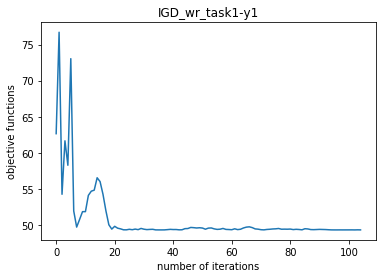

In [0]:
#1.1 IGD_wr_task1 with normal distribution y1
import matplotlib.pyplot as plt
output = IGD_wr_task1(y1)
# indexing = len(output[1])

# print(output[1])
plt.plot(output[1])
plt.title("IGD_wr_task1-y1")
plt.ylabel("objective functions")
plt.xlabel("number of iterations")
plt.show()

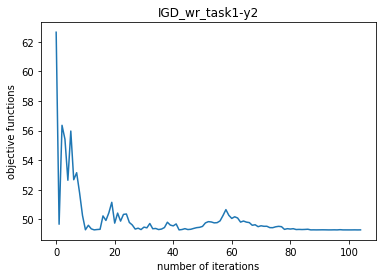

In [0]:
#1.2 IGD_wr_task1 with uniform distribution y2
output = IGD_wo_task1(y1)

plt.plot(output[1])
plt.title("IGD_wr_task1-y2")
plt.ylabel("objective functions")
plt.xlabel("number of iterations")
plt.show()

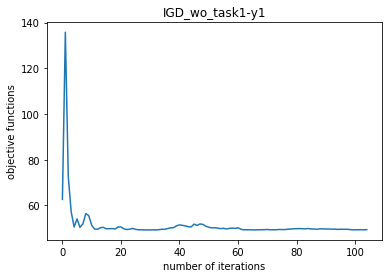

In [0]:
#2.1 IGD_wo_task1 with uniform distribution y1
output = IGD_wo_task1(y1)

plt.plot(output[1])
plt.title("IGD_wo_task1-y1")
plt.ylabel("objective functions")
plt.xlabel("number of iterations")
plt.show()

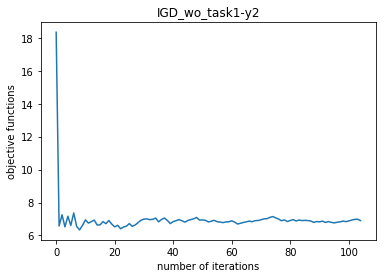

In [0]:
#2.2 IGD_wr_task1 with uniform distribution y2
output = IGD_wo_task1(y2)

plt.plot(output[1])
plt.title("IGD_wo_task1-y2")
plt.ylabel("objective functions")
plt.xlabel("number of iterations")
plt.show()

## Implementation Task 2

This task comes from the Section 2.1 of the reference paper as well. 

Instead of the problem in Task 1, we consider another problem, which is quite simple.

$$\min_x \frac{1}{2}\sum_{i=1}^n \beta_i (x - y)^2$$
here $\beta_i$ are positive weights, $y$ is a scalar. Clearly the minimum is at $x = y$. We try to use the IGD to solve the problem. 

$$x_{k+1} = x_k - \gamma_k \beta_{i_k} (x_k - y)$$

where $\gamma_k\equiv \gamma = 0.95 \min \beta_i^{-1}$. For simplicity, the $\beta_i$ are sampled uniformly between $[1,2]$. Your task2 is the same as the task1,  use two kinds of ordering to solve the problem and compare the results through figures.

In [0]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task2(y):
    n = len(y)
    num_epochs = 1
    f = []
    x = 0
    beta = np.random.uniform(1,2,n)
    for e in range(num_epochs):
        ordering = np.random.choice(n, n, replace=True)
        for i in range(n):
            loss = 1/2*np.sum(beta*(x-y)**2)
            f.append(loss)
            gamma = 0.95*np.min(1/beta)
            x = x-gamma*beta[ordering[i]]*(x-y)
        #         print(loss)
    return (x,f)


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task2(y):
    n = len(y)
    num_epochs = 1
    f = []
    x = 0
    beta = np.random.uniform(1,2,n)
    for e in range(num_epochs):
        ordering = np.random.choice(n, n, replace=False)
        for i in range(n):
            loss = 1/2*np.sum(beta*(x-y)**2)
            f.append(loss)
            gamma = 0.95*np.min(1/beta)
            x = x-gamma*beta[ordering[i]]*(x-y)
        #         print(loss)
    return (x,f)

### Your results to present
Show your results by plotting two figures. For each cases of the above two settings, you need to plot the histories (``IGD_wr_task2`` and ``IGD_wo_task2``) of objective functions in the same figure. 

Conclude which strategy is better from the results. 

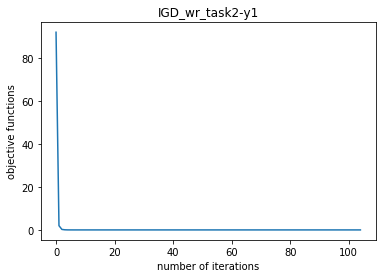

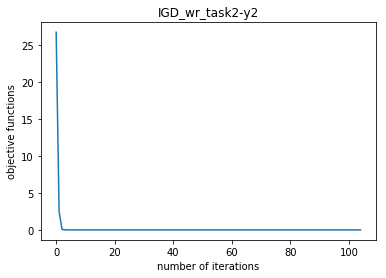

In [0]:


output = IGD_wr_task2(y1)
plt.plot(output[1])
plt.title("IGD_wr_task2-y1")
plt.ylabel("objective functions")
plt.xlabel("number of iterations")
plt.show()


output = IGD_wr_task2(y2)
plt.plot(output[1])
plt.title("IGD_wr_task2-y2")
plt.ylabel("objective functions")
plt.xlabel("number of iterations")
plt.show()



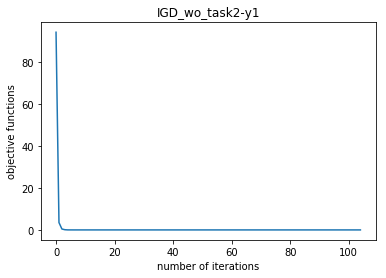

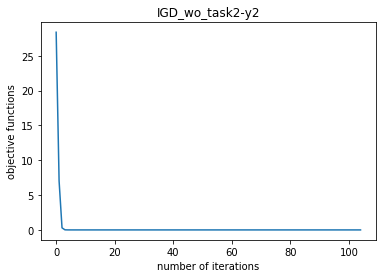

In [0]:


output = IGD_wo_task2(y1)
plt.plot(output[1])
plt.title("IGD_wo_task2-y1")
plt.ylabel("objective functions")
plt.xlabel("number of iterations")
plt.show()


output = IGD_wo_task2(y2)
plt.plot(output[1])
plt.title("IGD_wo_task2-y2")
plt.ylabel("objective functions")
plt.xlabel("number of iterations")
plt.show()


## Implementation Task 3

Now instead of 1D problem considered in above two tasks, we will consider the general case in higher dimensions, we study the least square problem to find solution of 
$$Ax = y$$
where $A$ is an $m\times n$ matrix and $x$ is a vector in $\mathbb{R}^n$. In most cases, $m \ge n$ which means the measurement is redundant for this linear model.  We denote the $i$th column $A^T$ as $a_i$ (namely the $i$th row of $A$ transposed), then we are minimizing

$$\min_x \sum_{i=1}^m (a_i^T x - y_i)^2$$
each $a_i\in\mathbb{R}^n$. 

And using IGD to minimize above problem with certain ordering. The step size $\gamma$ is  taken as a fixed constant, say $10^{-3}$, which is a common value for GD. 

Each iteration will be 

$$x_{k+1} = x_k - \gamma a_{i_k} (a_{i_k}^T x_{k} - y_{i_k})$$

Your initial guess is still all zeros vector. 


### Generation of $y$
The $y$ vector is generated by taking the following form
$$y_i = a_i^T x^{\ast} + w_i$$
where $w_i$ obeys normal distribution of zero mean and variance of $\rho^2$, here $\rho = 10^{-2}$. 

In [0]:
# generation of exact solution and data y and matrix A.

def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = A@x + w
    return A, x, y

In [0]:
# We generate the problem with 200x100 matrix. rho as 0.01.
#
A, xstar, y = generate_problem_task3(200, 100, 0.01)

In [0]:
print(A.shape)
print(xstar.shape)
print(y.shape)


(200, 100)
(100,)
(200,)


In [0]:
# In these two functions, we could only focus on the first n steps and try to make comparisons on these data only.
# In practice, it requires more iterations to converge, due to the matrix might not be easy to deal with.
# You can put the ordering loop into a naive loop: namely, we simply perform the IGD code several rounds.
#
#
#
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task3(y, A):

    n = len(y)
    num_epochs = 3
    f = []
    x = np.zeros(A.shape[1])
    x_history = []
    for e in range(num_epochs):
        ordering = np.random.choice(n, n, replace=True)
        for i in range(n):
        #         print(A[:,i].shape)
        #         print(x.shape)
        #         print(y[i].shape)
            loss = np.sum((A[i,:].T@x-y[i])**2)
            f.append(loss)
            gamma = 10e-3
            x = x-gamma*A[ordering[i],:]*(A[ordering[i],:].T@x-y[ordering[i]])
            x_history.append(x)
    return (x,f,x_history)

# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task3(y, A):
    n = len(y)
    num_epochs = 3
    f = []
    x = np.zeros(A.shape[1])
    x_history = []
    for e in range(num_epochs):
        ordering = np.random.choice(n, n, replace=True)
        for i in range(n):
            loss = np.sum((A[i,:].T@x-y[i])**2)
            f.append(loss)
            gamma = 10e-3
            x = x-gamma*A[ordering[i],:]*(A[ordering[i],:].T@x-y[ordering[i]])
            x_history.append(x)

    return (x,f,x_history)

### Your results to present
Show your results by plotting two figures. For each cases of the above two settings, you need to plot the histories (``IGD_wr_task3`` and ``IGD_wo_task3``) of objective functions in the same figure.  

Then change your code to plot the histories of $\|x_k - x^{\ast }\|$ and compare the results about the convergences.

Conclude which strategy is better from the results. 

In [0]:
from  numpy.linalg import norm

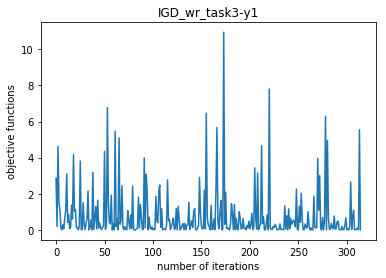

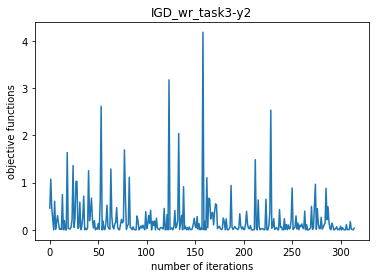

In [0]:

output = IGD_wr_task3(y1,A)
plt.plot(output[1])
plt.title("IGD_wr_task3-y1")
plt.ylabel("objective functions")
plt.xlabel("number of iterations")
plt.show()


output = IGD_wr_task3(y2,A)
plt.plot(output[1])
plt.title("IGD_wr_task3-y2")
plt.ylabel("objective functions")
plt.xlabel("number of iterations")
plt.show()



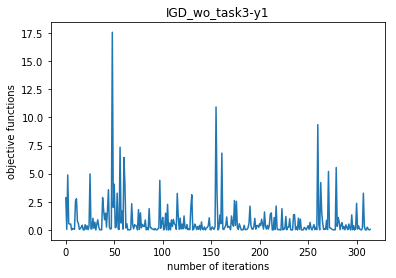

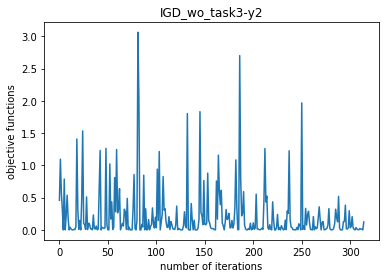

In [0]:

output = IGD_wo_task3(y1,A)
plt.plot(output[2]-x_history)
plt.title("IGD_wo_task3-y1")
plt.ylabel("objective functions")
plt.xlabel("number of iterations")
plt.show()


output = IGD_wo_task3(y2,A)
plt.plot(output[1])
plt.title("IGD_wo_task3-y2")
plt.ylabel("objective functions")
plt.xlabel("number of iterations")
plt.show()

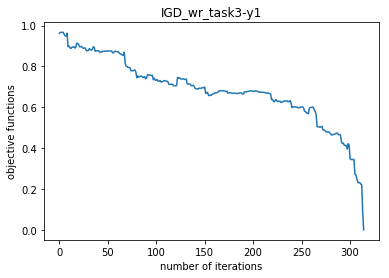

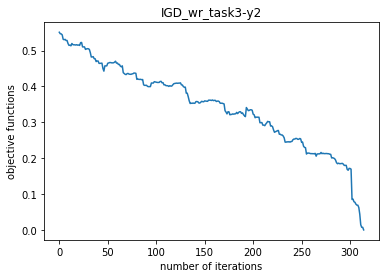

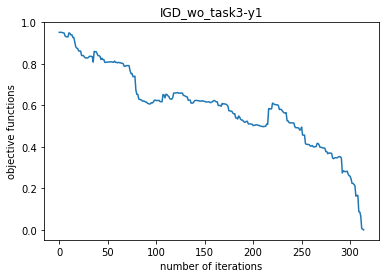

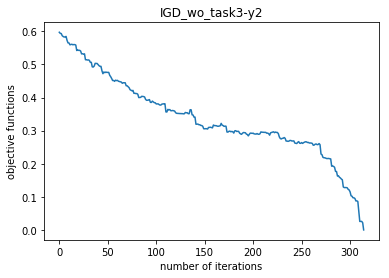

In [0]:
#plot the difference

output = IGD_wr_task3(y1,A)
plt.plot(norm((output[2]-output[0]),axis = 1))
plt.title("IGD_wr_task3-y1")
plt.ylabel("objective functions")
plt.xlabel("number of iterations")
plt.show()


output = IGD_wr_task3(y2,A)
plt.plot(norm((output[2]-output[0]),axis = 1))
plt.title("IGD_wr_task3-y2")
plt.ylabel("objective functions")
plt.xlabel("number of iterations")
plt.show()



output = IGD_wo_task3(y1,A)
plt.plot(norm((output[2]-output[0]),axis = 1))
plt.title("IGD_wo_task3-y1")
plt.ylabel("objective functions")
plt.xlabel("number of iterations")
plt.show()


output = IGD_wo_task3(y2,A)
plt.plot(norm((output[2]-output[0]),axis = 1))
plt.title("IGD_wo_task3-y2")
plt.ylabel("objective functions")
plt.xlabel("number of iterations")
plt.show()